# Overview
* Investigate data
* Ask questions
* Clean data:
(Incorrect data types, missing data, and inaccurate data are all problems that we'd need to fix before analyzing this data)
* Explore data
* Model predict
* Conclude
* Communication


# Investigate Data:

The Ramen Rater is a product review website for the hardcore ramen enthusiast (or "ramenphile")

### Using Documentation to Understand Data

Each record in the dataset is a single ramen product review.
Match the meaning for each feature

* Brand: Brand of Ramen
* Variety: the product name (can show the flavor, outstanding ingredients of Ramen)
* Country: Country where ramen is produced
* Style: how Reman is packaged: Cup/ Bowl/ Tray...
* Stars indicate the ramen quality, as assessed by the reviewer, on a 5-point scale ( from 0 to 5 start)

# Ask questions :

Analyst 
1. What country produces the highest amount of ramen products 
2. Whats the country with the highest rating products 
3. Is there a significant difference between brand average scores?
4. Does the product style affect the score directly? Does a certain kind of product style mean a lower score?
5. What ingredients or flavors are most commonly advertised on ramen package labels?
6. Do the scores follow a normal distribution, or are the scores skewed? What's the brand that skews the distribution?

Engine

1. Extract the meat type from the variety feature
2. Extract the noodle type from the variety feature
3. Extract the presence of the word  'Flavor' from the variety feature
4. Extract the presence of the word  'Spicy' to declare a product as spicy or not


# Assess data :

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from statistics import mode
import re
from scipy import stats
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import lightgbm as ltb

In [2]:
# import the data
raw_df = pd.read_csv('ramen-ratings.csv')
raw_df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [3]:
#Check info of data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


#####  which this info I see that the data type of Start need to ajust to float

In [4]:
# check null of  the dataset
raw_df.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [5]:
# check duplicates of the dataset 
raw_df.duplicated().sum()

0

In [6]:
# check unique numbers for each column in dataset
raw_df.nunique()

Review #    2580
Brand        355
Variety     2413
Style          7
Country       38
Stars         51
Top Ten       38
dtype: int64

In [7]:
# Check value of "Stars" columns
raw_df.Stars.value_counts()

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
0           26
1           26
2.25        21
0.5         14
0.25        11
1.25        10
5.0         10
3.50         9
5.00         7
4.00         6
4.3          4
Unrated      3
4.50         3
4.0          3
3.8          3
2.9          2
3.0          2
1.1          2
4.125        2
2.3          2
2.8          2
3.1          2
0.75         1
3.4          1
0.9          1
3.6          1
3.3          1
3.125        1
1.8          1
0.1          1
3.7          1
2.1          1
2.125        1
3.00         1
3.65         1
3.2          1
2.85         1
Name: Stars, dtype: int64

##### There have the value "unrated" >> need to drop

# Clean Data

In [8]:
# Check column name
raw_df.columns.values

array(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars',
       'Top Ten'], dtype=object)

### 1. Rename Columns
* Change all column names to lower.
* Remove all leading / trailing spaces in column names (if any). Replace the space between words with "_"

In [9]:
raw_df.rename(columns = lambda x: x.strip().lower().replace(" ","_"),inplace = True)
#cofirm changes 
raw_df.head(1)

,review_#,brand,variety,style,country,stars,top_ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN


### 2. Fill Nulls
Drop any rows in both datasets that contain missing values

In [10]:
# see what row contain null value
raw_df_null = raw_df[raw_df['style'].isnull()]
raw_df_null

,review_#,brand,variety,style,country,stars,top_ten
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3,NaN


In [11]:
# fill null data
raw_df['style'].fillna(raw_df['style'].mode()[0],inplace=True)
# check change 
raw_df.isnull().sum()

review_#       0
brand          0
variety        0
style          0
country        0
stars          0
top_ten     2539
dtype: int64

### 3. Fixing Data Types
Change datatype of 'start' columns from string to float

In [12]:
# Keep values in "stars" different with "Unrated"
raw_df = raw_df[raw_df['stars'] != "Unrated"]

In [13]:
# Change data type
raw_df['stars'] = raw_df['stars'].astype(float)

In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   review_#  2577 non-null   int64  
 1   brand     2577 non-null   object 
 2   variety   2577 non-null   object 
 3   style     2577 non-null   object 
 4   country   2577 non-null   object 
 5   stars     2577 non-null   float64
 6   top_ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 161.1+ KB


### 4. Change style, brand, country to specific value


In [15]:
# make copy of df
df = raw_df.copy()

In [16]:
# Creat a dict of value of style, brand, country columns
dict_style = {df['style'].unique()[i]: i+1 for i in range(0,len(df['style'].unique()))} ### .style is format of table 
dict_brand = {df.brand.unique()[i]: i+1 for i in range(0,len(df.brand.unique()))}
dict_country = {df.country.unique()[i]: i+1 for i in range(0,len(df.country.unique()))}

In [17]:
# Replace 
df.brand.replace(dict_brand,inplace = True)
df.country.replace(dict_country,inplace = True)
df.head()

,review_#,brand,variety,style,country,stars,top_ten
0,2580,1,T's Restaurant Tantanmen,Cup,1,3.75,NaN
1,2579,2,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,2,1.00,NaN
2,2578,3,Cup Noodles Chicken Vegetable,Cup,3,2.25,NaN
3,2577,4,GGE Ramen Snack Tomato Flavor,Pack,2,2.75,NaN
4,2576,5,Singapore Curry,Pack,4,3.75,NaN


### 5.  Extract value about meat, type of noodle, flavor and spicy from variety column

In [18]:
# Creat funtion by words contain in variety column.
meat_types = ['chicken','beef','duck','pork','shrimp','turkey']
noodle_types = ['udon','soba','ramen','egg','shirataki','hokkien','noodles']

def meat_check(var): 
    content = var.lower()
    for meat in meat_types: 
        if meat in content: 
            return meat 
    return 'unspecified'
        
def noodle_check(var):
    content = var.lower()
    for noodle_type in noodle_types:
        if noodle_type in content: 
            return noodle_type
    return 'unspecified'

def is_spicy(var):
    content = var.lower()
    spc = ['spicy','hot','flaming','chili']
    for t in spc:
        if t in content:
            return 1
    return 0

def contain_flavor(var):
    content = var.lower()
    if "flavor" in content:
        return 1
    else:
        return 0
# Apply function to df 
df['contain_flavor'] = df.variety.apply(contain_flavor)
df['is_spicy'] = df.variety.apply(is_spicy)
df['meat_types'] = df.variety.apply(meat_check)
df['noodle_types'] = df.variety.apply(noodle_check)
df.head()

,review_#,brand,variety,style,country,stars,top_ten,contain_flavor,is_spicy,meat_types,noodle_types
0,2580,1,T's Restaurant Tantanmen,Cup,1,3.75,NaN,0,0,unspecified,unspecified
1,2579,2,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,2,1.00,NaN,0,1,unspecified,noodles
2,2578,3,Cup Noodles Chicken Vegetable,Cup,3,2.25,NaN,0,0,chicken,noodles
3,2577,4,GGE Ramen Snack Tomato Flavor,Pack,2,2.75,NaN,1,0,unspecified,ramen
4,2576,5,Singapore Curry,Pack,4,3.75,NaN,0,0,unspecified,unspecified


In [19]:
# Create dict of meat_types and noodle_types
dict_meat_types = {df['meat_types'].unique()[i]: i+1 for i in range(0,len(df['meat_types'].unique()))}
dict_noodle_types =  {df['noodle_types'].unique()[i]: i+1 for i in range(0,len(df['noodle_types'].unique()))}
df.head()

,review_#,brand,variety,style,country,stars,top_ten,contain_flavor,is_spicy,meat_types,noodle_types
0,2580,1,T's Restaurant Tantanmen,Cup,1,3.75,NaN,0,0,unspecified,unspecified
1,2579,2,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,2,1.00,NaN,0,1,unspecified,noodles
2,2578,3,Cup Noodles Chicken Vegetable,Cup,3,2.25,NaN,0,0,chicken,noodles
3,2577,4,GGE Ramen Snack Tomato Flavor,Pack,2,2.75,NaN,1,0,unspecified,ramen
4,2576,5,Singapore Curry,Pack,4,3.75,NaN,0,0,unspecified,unspecified


In [20]:
df.columns

Index(['review_#', 'brand', 'variety', 'style', 'country', 'stars', 'top_ten',
       'contain_flavor', 'is_spicy', 'meat_types', 'noodle_types'],
      dtype='object')

In [21]:
u_df = df[['brand', 'style', 'country', 'stars',
       'contain_flavor', 'is_spicy', 'meat_types', 'noodle_types']]
u_df.head()

,brand,style,country,stars,contain_flavor,is_spicy,meat_types,noodle_types
0,1,Cup,1,3.75,0,0,unspecified,unspecified
1,2,Pack,2,1.00,0,1,unspecified,noodles
2,3,Cup,3,2.25,0,0,chicken,noodles
3,4,Pack,2,2.75,1,0,unspecified,ramen
4,5,Pack,4,3.75,0,0,unspecified,unspecified


# Exploratory Data Analysis
In this part we can answer some question above

### 1. Exploratory Data by Country

##### Question 1. What country produces the highest amount of ramen products?? 

In [22]:
count_by_country = raw_df.groupby('country').count().sort_values(by=['variety'],ascending = False) ## Can choose any column without 
count_by_country.head()

,review_#,brand,variety,style,stars,top_ten
country,,,,,,
Japan,352,352,352,352,352,6
USA,323,323,323,323,323,1
South Korea,307,307,307,307,307,7
Taiwan,224,224,224,224,224,2
Thailand,191,191,191,191,191,3


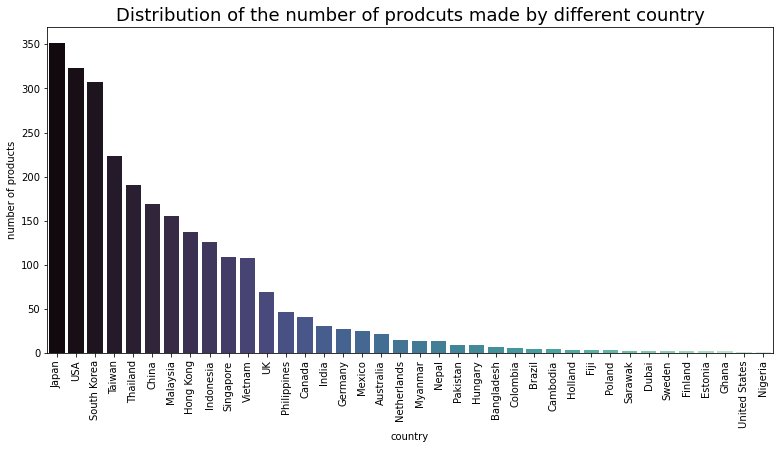

In [23]:
plt.figure(figsize=(13,6))
PbC = sns.barplot(count_by_country.index,count_by_country.variety,palette='mako')

PbC.set_title('Distribution of the number of prodcuts made by different country',fontsize=18)
PbC.set_xticklabels(PbC.get_xticklabels(),rotation=90)
PbC.set_ylabel('number of products')

None  #don't show the label objects 

#### Japan is country produces the highest amount of ramen products with total is 352 products 

###### Question 2. Whats the country with the highest rating products

In [24]:
stars_by_country = raw_df.groupby('country').sum().sort_values(by=['stars'],ascending = False)
stars_by_country.head()

,review_#,stars
country,,
Japan,484327,1401.525
South Korea,308186,1163.700
USA,351014,1116.625
Taiwan,290380,821.050
Thailand,217954,646.500


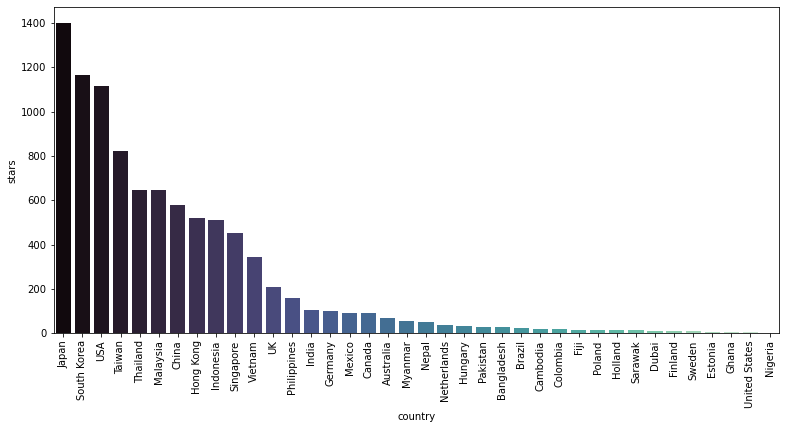

In [25]:
plt.figure(figsize=(13,6))
SbC = sns.barplot(stars_by_country.index,stars_by_country.stars,palette='mako')
PbC.set_title("Distribution of prodcuts'rating  made by different country",fontsize=18)
SbC.set_xticklabels(SbC.get_xticklabels(),rotation=90)

None  #don't show the label objects

#### Japan is the country with the highest rating products. Total rating for Japan'Ramen reach to 1401.525 point . 

### 2. Exploratory Data by Brand

###### Group Brand by products

Looking at the data of products distributed with Brand, we see that 'Nissin' is the brand that almost dominates the market with 381 products (4 times more than the 2nd brand right after that). So it is easy to see that this is a prominent brand we can focus on 'Nissin' in the analysis process.

###### Question 3 Is there a significant difference between brand average scores?

In [26]:
group_by_brand = raw_df.groupby('brand').count()
stars_by_brand = raw_df.groupby('brand').sum()
combine_by_brand = pd.concat([group_by_brand.variety,stars_by_brand], axis = 1)
combine_by_brand['average_rating'] = combine_by_brand['stars']/ combine_by_brand['variety']
DF =  combine_by_brand.reset_index().sort_values(by=['average_rating'],ascending = False).head(30)

<Figure size 1440x720 with 0 Axes>

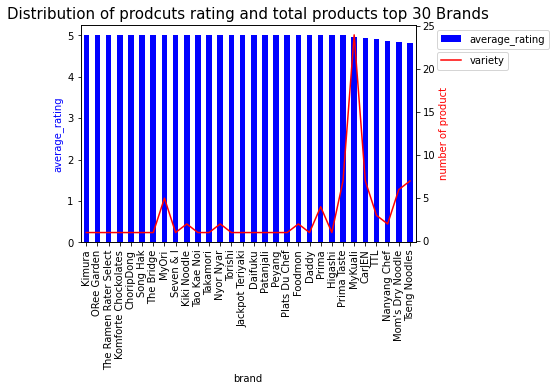

In [27]:
plt.figure(figsize=(20,10))
ax  = DF.plot(x="brand",y="average_rating",color="b",kind="bar")
ax2 = DF.plot(x="brand",y="variety", color="r", ax=ax, secondary_y=True)
ax.set_ylabel("average_rating", color="b")
ax2.set_ylabel("number of product", color="r")
ax.set_title("Distribution of prodcuts rating and total products top 30 Brands",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax2.legend(bbox_to_anchor=(1.05, 0.9), loc='upper left')
None

####  There are many Brands with an average rating of up to 5 stars, but most of them have less than 5 products (around 1> 2 products) . So the average rating by brand can't tell us which brand is the best.

### 3. Exploratory Data by style

###### Question 4 Does the product style affect the score directly? Does a certain kind of product style mean a lower score?

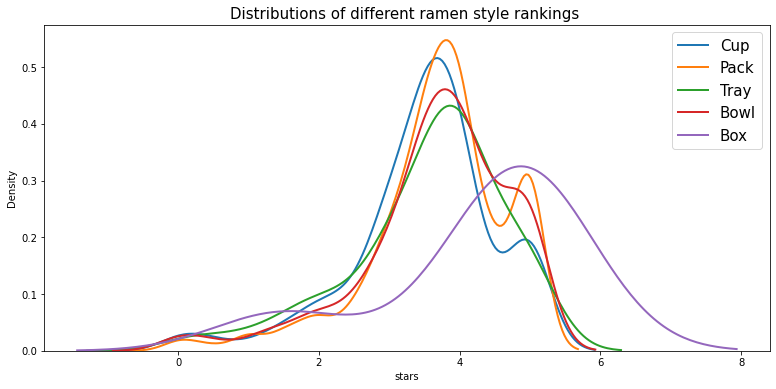

In [28]:
plt.figure(figsize=(13,6))
for i in dict_style.keys():
    RbS = sns.distplot(raw_df[raw_df['style']==i]['stars'],hist=False,label = i,kde_kws={'lw':2})
plt.legend(prop={'size':15})
RbS.set_title('Distributions of different ramen style rankings ',fontsize=15)

plt.show()

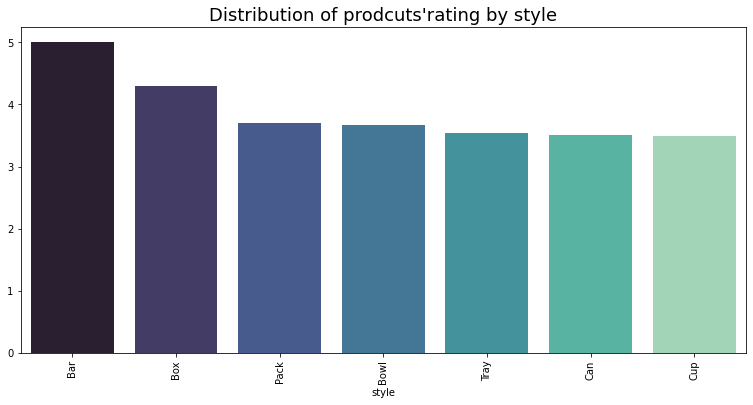

In [29]:
plt.figure(figsize=(13,6))
count_by_style = raw_df.groupby('style').count().sort_values(by=['variety'],ascending = False)
stars_by_style = raw_df.groupby('style').sum().sort_values(by=['stars'],ascending = False)
average_stars_by_style = (stars_by_style.stars/count_by_style.variety).sort_values(ascending = False)

SbS = sns.barplot(average_stars_by_style.index,average_stars_by_style,palette='mako')
SbS.set_title("Distribution of prodcuts'rating by style",fontsize=18)
SbS.set_xticklabels(SbS.get_xticklabels(),rotation=90)
None 

### 4. Stars by meats 

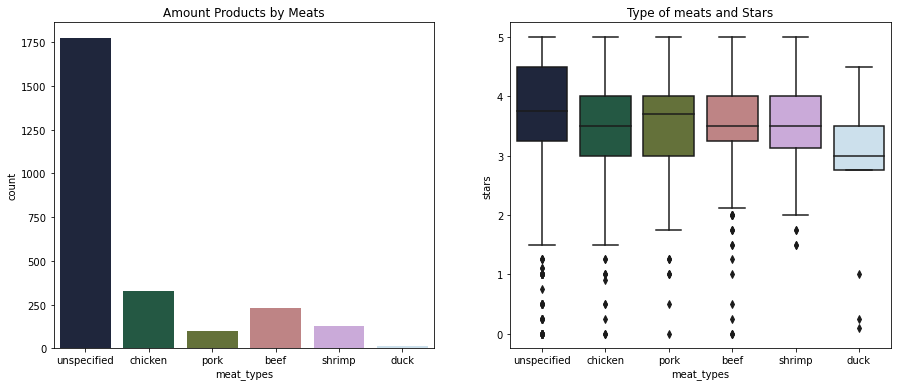

In [30]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Amount Products by Meats')
sns.countplot(df.meat_types, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Type of meats and Stars')
sns.boxplot(x=df.meat_types, y=df.stars, palette=("cubehelix"))

plt.show()



### 5. Stars by spicy

In [31]:
df.head()

,review_#,brand,variety,style,country,stars,top_ten,contain_flavor,is_spicy,meat_types,noodle_types
0,2580,1,T's Restaurant Tantanmen,Cup,1,3.75,NaN,0,0,unspecified,unspecified
1,2579,2,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,2,1.00,NaN,0,1,unspecified,noodles
2,2578,3,Cup Noodles Chicken Vegetable,Cup,3,2.25,NaN,0,0,chicken,noodles
3,2577,4,GGE Ramen Snack Tomato Flavor,Pack,2,2.75,NaN,1,0,unspecified,ramen
4,2576,5,Singapore Curry,Pack,4,3.75,NaN,0,0,unspecified,unspecified


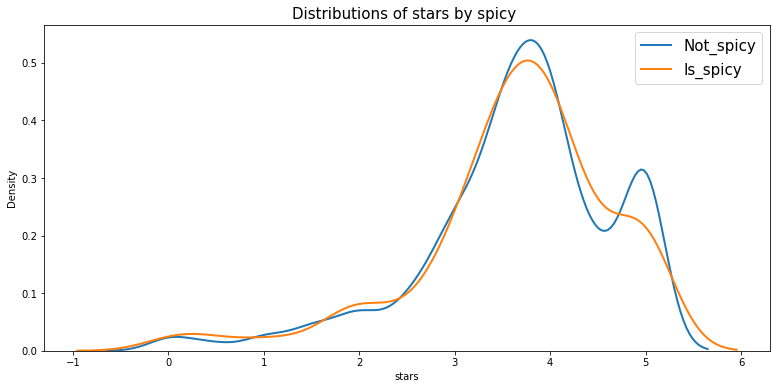

In [32]:
plt.figure(figsize=(13,6))
SbS = sns.distplot(df[df['is_spicy']==0]['stars'],hist=False,label = "Not_spicy",kde_kws={'lw':2})
SbS = sns.distplot(df[df['is_spicy']==1]['stars'],hist=False,label = "Is_spicy",kde_kws={'lw':2})
plt.legend(prop={'size':15})
SbS.set_title('Distributions of stars by spicy ',fontsize=15)

plt.show()

### 6. Stars by flavour 

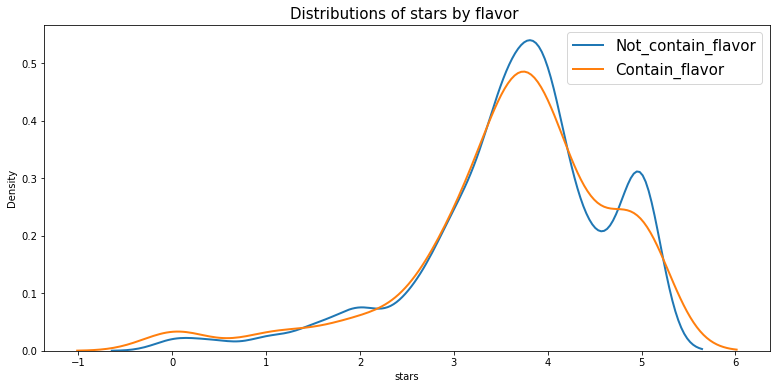

In [33]:
plt.figure(figsize=(13,6))
SbF = sns.distplot(df[df['contain_flavor']==0]['stars'],hist=False,label = "Not_contain_flavor",kde_kws={'lw':2})
SbF = sns.distplot(df[df['contain_flavor']==1]['stars'],hist=False,label = "Contain_flavor",kde_kws={'lw':2})
plt.legend(prop={'size':15})
SbF.set_title('Distributions of stars by flavor ',fontsize=15)

plt.show()

# Model 


###  1. Prepare data for predict 

In [34]:
u_df.head()

,brand,style,country,stars,contain_flavor,is_spicy,meat_types,noodle_types
0,1,Cup,1,3.75,0,0,unspecified,unspecified
1,2,Pack,2,1.00,0,1,unspecified,noodles
2,3,Cup,3,2.25,0,0,chicken,noodles
3,4,Pack,2,2.75,1,0,unspecified,ramen
4,5,Pack,4,3.75,0,0,unspecified,unspecified


In [35]:
meats = pd.get_dummies(u_df['meat_types'])
styles = pd.get_dummies(u_df['style'])
DP = pd.concat([u_df,meats,styles],axis= 1)
DP.drop(['meat_types','style'],axis=1,inplace=True)
DP.rename(columns = {"unspecified":"other_meat"},inplace = True)
# noodle_types = pd.get_dummies(u_df['noodle_types'])
# DP = pd.concat([DP,noodle_types],axis= 1)
# DP.rename(columns = {"unspecified":"other_noodle_styles"},inplace = True)

In [36]:
DP.head()

,brand,country,stars,contain_flavor,is_spicy,noodle_types,beef,chicken,duck,pork,shrimp,other_meat,Bar,Bowl,Box,Can,Cup,Pack,Tray
0,1,1,3.75,0,0,unspecified,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2,2,1.00,0,1,noodles,0,0,0,0,0,1,0,0,0,0,0,1,0
2,3,3,2.25,0,0,noodles,0,1,0,0,0,0,0,0,0,0,1,0,0
3,4,2,2.75,1,0,ramen,0,0,0,0,0,1,0,0,0,0,0,1,0
4,5,4,3.75,0,0,unspecified,0,0,0,0,0,1,0,0,0,0,0,1,0


In [37]:
# Replace numberic in 'style', 'meat_types' and'noodle_types' columns
DP.noodle_types.replace(dict_noodle_types,inplace = True)
DP.head()

,brand,country,stars,contain_flavor,is_spicy,noodle_types,beef,chicken,duck,pork,shrimp,other_meat,Bar,Bowl,Box,Can,Cup,Pack,Tray
0,1,1,3.75,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2,2,1.00,0,1,2,0,0,0,0,0,1,0,0,0,0,0,1,0
2,3,3,2.25,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0,0
3,4,2,2.75,1,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0
4,5,4,3.75,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [38]:
X= DP.drop('stars',axis=1)
y= DP['stars']
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 2. Training & Testing of Model

#### I don't going deep into the model part. Just simply do a quick check to get the results of the regression models by LazyPredict and choose the one with the best results for testing.

In [39]:
# test and choose top 10 of model regressor with best results with our data
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
models.head(10)

 24%|███████████████████▌                                                              | 10/42 [00:01<00:04,  6.58it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:11<00:00,  3.79it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.17,0.20,0.89,0.23
HistGradientBoostingRegressor,0.16,0.19,0.89,1.57
GradientBoostingRegressor,0.11,0.14,0.92,0.18
RandomForestRegressor,0.10,0.13,0.93,0.58
XGBRegressor,0.09,0.12,0.93,0.46
BaggingRegressor,0.06,0.09,0.95,0.11
SGDRegressor,-0.00,0.03,0.98,0.02
PoissonRegressor,-0.00,0.03,0.98,0.04
TweedieRegressor,-0.00,0.03,0.98,0.02


#### I choose the  LGBMRegressor base on Lazyprect output to test the result of the model

In [40]:
model = ltb.LGBMRegressor()
model.fit(x_train, y_train)
print(); print(model)

expected_y  = y_test
predicted_y = model.predict(x_test)
print('R2 Score :', metrics.r2_score(expected_y, predicted_y))


LGBMRegressor()
R2 Score : 0.18730722331572758


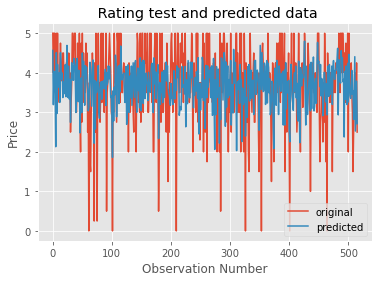

In [41]:
plt.style.use('ggplot')

number_of_observations=2500

x_ax = range(len(expected_y[:number_of_observations]))

plt.plot(x_ax, expected_y[:number_of_observations], label="original")

plt.plot(x_ax, predicted_y[:number_of_observations], label="predicted")

plt.title(" Rating test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

####  Well, the result is not bad but not good. Maybe, I need to adjust the data and model for the better result but i will do that later. Thank you for reading my notebook!!!